In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from gensim.models import Word2Vec
from gensim.models.word2vec import Text8Corpus
from stop_words import get_stop_words
from googletrans import Translator
from langdetect import detect
ROOT_DIR = os.path.abspath(os.curdir)

UNIFICACIÓN DE DATOS

In [2]:
translator = Translator()
def getSpanish( texto ):
    try:
        language = detect(texto)
        if language == 'en':
            idioma_origen = translator.detect(texto).lang
            traduccion = translator.translate(texto, src=idioma_origen, dest='es')
            texto = traduccion.text
    except:
        print("error->", texto)
        texto = ""
    return texto


In [3]:
def getFilesNames():
    DIR = os.path.join(ROOT_DIR, "descargas")
    os.chdir(DIR)
    ls = glob.glob("*.csv")
    return ls

In [4]:
file_name_list = getFilesNames()
dataframes = [ pd.read_csv(file,index_col=0) for file in file_name_list ]
dataset = pd.concat(dataframes)
dataset.head()

,coordenada,calificacion,comentario
titulo,,,
Restaurant SONIA,"-12.0773039,-77.1696105,11z",4,"Buena atención y el buen sabor se mantiene, lo..."
Restaurant SONIA,"-12.0773039,-77.1696105,11z",3,Nada del otro mundo.\nRegrese a Sonia después ...
Restaurant SONIA,"-12.0773039,-77.1696105,11z",4,"Si bien la comida es deliciosa, quizás los pre..."
Restaurant SONIA,"-12.0773039,-77.1696105,11z",5,He vuelto después de muchos años y debo decir ...
Restaurant SONIA,"-12.0773039,-77.1696105,11z",1,Vi los reviews y por eso fuimos probar a este ...


In [5]:
dataset.describe()

,coordenada,calificacion,comentario
count,10664,11350,11350
unique,17,5,10536
top,"-12.1440338,-77.0758734,13z",5,Muy bueno
freq,3113,6701,105


In [6]:
DIR = os.path.join(ROOT_DIR, "datajoin")
os.chdir(DIR)
dataset.to_csv('restaurantes_comentarios.csv', index=False)

Text(0.5, 1.0, 'Histograma')

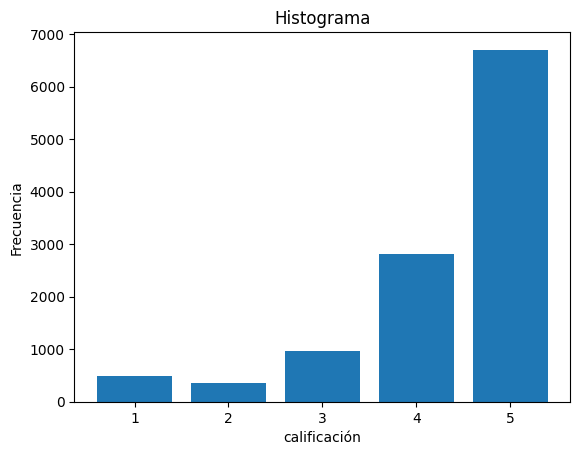

In [7]:
data_calification = dataset['calificacion']
unique_categories, category_counts = np.unique(data_calification, return_counts=True)
plt.bar(unique_categories, category_counts)
plt.xlabel('calificación')
plt.ylabel('Frecuencia')
plt.title('Histograma')

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11350 entries, Restaurant SONIA to La Preferida
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   coordenada    10664 non-null  object
 1   calificacion  11350 non-null  object
 2   comentario    11350 non-null  object
dtypes: object(3)
memory usage: 354.7+ KB


Elaboración Corpus linguistico

In [9]:
data = pd.read_csv('restaurantes_comentarios.csv')
data.head()

,coordenada,calificacion,comentario
0,"-12.0773039,-77.1696105,11z",4,"Buena atención y el buen sabor se mantiene, lo..."
1,"-12.0773039,-77.1696105,11z",3,Nada del otro mundo.\nRegrese a Sonia después ...
2,"-12.0773039,-77.1696105,11z",4,"Si bien la comida es deliciosa, quizás los pre..."
3,"-12.0773039,-77.1696105,11z",5,He vuelto después de muchos años y debo decir ...
4,"-12.0773039,-77.1696105,11z",1,Vi los reviews y por eso fuimos probar a este ...


In [10]:
data = data[data['comentario'].notnull()]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11350 entries, 0 to 11349
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   coordenada    10664 non-null  object
 1   calificacion  11350 non-null  int64 
 2   comentario    11350 non-null  object
dtypes: int64(1), object(2)
memory usage: 266.1+ KB


In [12]:
data['comentario'] = data['comentario'].str.lower()

In [13]:
import re

data['comentario_limpio'] = data['comentario'].apply(lambda texto: re.sub(r'[.,;:!()]', '', texto)) 
data['comentario_limpio'] = data['comentario_limpio'].apply(lambda texto: texto.replace('\n', ' ')) 
data['comentario_limpio'] = data['comentario_limpio'].apply(lambda texto: re.sub(r'[^A-Za-zñáéíóúÁÉÍÓÚ\s]', ' ', texto))

In [14]:
data['comentario_limpio'] = data['comentario'].apply(lambda texto: getSpanish(texto))

error-> 😋…
error-> 👍…
error-> 👍…
error-> 💖💖💖…
error-> 👌🏻…
error-> 🔝🔝🔝…
error-> 👌💪👍…
error-> 👍👍👍…
error-> 👍…
error-> 👍 👍…
error-> 👍…
error-> 👏🏼👍🏼…
error-> ❤️
error-> 👍🏻…
error-> 👏🏿👏🏻👋🏽👏👏🏾…


In [15]:
#data[data['comentario_limpio']==""]
data = data.drop(data[data['comentario_limpio'] == ''].index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11335 entries, 0 to 11349
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   coordenada         10649 non-null  object
 1   calificacion       11335 non-null  int64 
 2   comentario         11335 non-null  object
 3   comentario_limpio  11335 non-null  object
dtypes: int64(1), object(3)
memory usage: 442.8+ KB


In [16]:
data['comentario_limpio'].head(10)

0    buena atención y el buen sabor se mantiene, lo...
1    nada del otro mundo.\nregrese a sonia después ...
2    si bien la comida es deliciosa, quizás los pre...
3    he vuelto después de muchos años y debo decir ...
4    vi los reviews y por eso fuimos probar a este ...
5    pedí una parihuela, que no fue nada de mi agra...
6       me gustó estos dos platos, estuve delicioso 😋…
7    este lugar es super caleta, atienden a puerta ...
8    nos dejaron esperando en la puerta. le pedimos...
9    la seguridad del local es pésima. te hacen esp...
Name: comentario_limpio, dtype: object

Eliminar stopwords-> son palabras comunes que se considera irrelevantes para el análisis de texto debido a su alta frecuencia de aparición en un idioma determinado.

In [17]:
stop_words = get_stop_words('spanish')
stop_words.append("n")
stop_words.append("x")
stop_words.append("soles")
def deleteStopWord(text):
    response = ""
    tokens = text.split(" ")
    i = 0
    for ti in tokens:
        if(ti in stop_words):
            continue
        else:
            if i == 0:
                response = ti
            else:
                response = response + " " + ti
        i = i + 1
    return response

In [18]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [19]:
data['comentario_limpio'] = data['comentario_limpio'].apply(lambda texto: remove_emojis(texto))
data['comentario_limpio'] = data['comentario_limpio'].apply(lambda texto: texto.replace('\n', ' ')) 
data['comentario_limpio'].head(10)

0    buena atención y el buen sabor se mantiene, lo...
1    nada del otro mundo. regrese a sonia después d...
2    si bien la comida es deliciosa, quizás los pre...
3    he vuelto después de muchos años y debo decir ...
4    vi los reviews y por eso fuimos probar a este ...
5    pedí una parihuela, que no fue nada de mi agra...
6        me gustó estos dos platos, estuve delicioso …
7    este lugar es super caleta, atienden a puerta ...
8    nos dejaron esperando en la puerta. le pedimos...
9    la seguridad del local es pésima. te hacen esp...
Name: comentario_limpio, dtype: object

In [20]:
data['comentario_limpio'] = data['comentario_limpio'].apply(lambda texto: deleteStopWord(texto))
data['comentario_limpio'].head(10)

0    buena atención buen sabor mantiene, platos mej...
1    mundo. regrese sonia después tiempo parece des...
2    si bien comida deliciosa, quizás precios eleva...
3    vuelto después años debo decir sigue tan rico ...
4    vi reviews probar cevicheria, si platos jarra ...
5    pedí parihuela, agrado, demasiado chuño decir ...
6                        gustó dos platos, delicioso …
7    lugar super caleta, atienden puerta cerrada. i...
8    dejaron esperando puerta. pedimos administrado...
9    seguridad local pésima. hacen esperar afuera l...
Name: comentario_limpio, dtype: object

In [21]:
dataset.to_csv('procesado_comentario_restaurantes.csv')
data.head(5)
data.dtypes

coordenada           object
calificacion          int64
comentario           object
comentario_limpio    object
dtype: object

In [22]:
df2 = pd.DataFrame(data["comentario_limpio"].values)
np.savetxt("comentarios_sentimientos.txt",df2,fmt="%s",encoding="utf-8")

2. Word2Vec

In [23]:
model = Word2Vec()
model.build_vocab(Text8Corpus('comentarios_sentimientos.txt'))
model.train(Text8Corpus('comentarios_sentimientos.txt'), total_examples=model.corpus_count, epochs=model.epochs)
#oraciones = word2vec.Text8Corpus("comentarios_sentimientos.txt")
#modelo_w2v = word2vec.Word2Vec(oraciones,vector_size=100)

(289999, 457910)

In [24]:
def getFV(document):
    words=document.split()
    s=np.zeros(100)
    k=1
    for w in words:
        if w in model.wv.index_to_key:
            s=s+model.wv.get_vector(w)
            k=k+1
    return s/k

In [25]:
word_vectors = model.wv 
word_vectors.most_similar("riquísimo")

[('momento', 0.9993312954902649),
 ('recomendable.', 0.9993172883987427),
 ('trato', 0.9993147253990173),
 ('pequeño', 0.9992994070053101),
 ('rica,', 0.9992946982383728),
 ('siempre', 0.9992891550064087),
 ('súper', 0.9992866516113281),
 ('rico,', 0.9992832541465759),
 ('rico.', 0.9992823004722595),
 ('sirven', 0.999276876449585)]

In [28]:
print(getFV('rico'))

[-0.21597897  0.11104041  0.12423711  0.02906758  0.05967515 -0.26821095
  0.1853725   0.45176706 -0.14116794 -0.18145564 -0.16022994 -0.38798761
  0.08871934  0.13005179  0.06541296 -0.11496106  0.13129163 -0.09715427
  0.09549851 -0.34361166  0.05671287  0.19590873  0.03825959 -0.36755601
  0.04202948 -0.15272674 -0.08577094 -0.12336846 -0.15189336 -0.0121816
  0.22982948  0.02264395  0.04116334 -0.21037415 -0.09322512  0.37652898
  0.07733034 -0.13062823 -0.0568683  -0.37469539  0.05775356 -0.19478188
 -0.02758822 -0.04234299  0.22121271  0.01828322 -0.29830155 -0.05171837
  0.28675517 -0.06447833  0.16386749 -0.19061005  0.01588035  0.01922228
 -0.17164361  0.14132996  0.08322087 -0.01889614 -0.19401769  0.10318489
 -0.05317625  0.00882185  0.0241692  -0.00065383 -0.41369143  0.19437264
  0.08617026  0.21072026 -0.21573585  0.34596387 -0.11593722  0.12728395
  0.14035389  0.04813074  0.21805637  0.10321175  0.11269778 -0.02589092
 -0.14018665  0.20162369 -0.19289492 -0.02016143 -0.

In [33]:
data_set = []
for index, row in data.iterrows():
    evaluacion = -1
    if row['calificacion'] <= 2:
        evaluacion = 0
    elif row['calificacion'] >= 4:
        evaluacion = 1
    if evaluacion != -1:
        vector = getFV(row['comentario_limpio'])
        new_vector = np.append(vector, evaluacion)
        data_set.append(new_vector)

In [34]:
data_set_transformada = pd.DataFrame(np.array(data_set))

In [35]:
data_set_transformada.head(5)

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,-0.295587,0.144083,0.176772,0.026896,0.078003,-0.382077,0.238828,0.614175,-0.202114,-0.237280,...,0.175144,0.042817,0.175218,0.696559,0.535637,-0.029580,-0.406479,0.307927,0.072473,1.0
1,-0.296341,0.142396,0.172736,0.028382,0.073111,-0.375925,0.240175,0.607265,-0.198618,-0.233694,...,0.171890,0.041459,0.173374,0.686505,0.526905,-0.029691,-0.402807,0.297331,0.067954,1.0
2,-0.327805,0.158564,0.191962,0.031795,0.082672,-0.420016,0.265809,0.676171,-0.220678,-0.258909,...,0.190493,0.045422,0.194045,0.766796,0.590801,-0.034510,-0.448653,0.335305,0.080624,1.0
3,-0.240621,0.112559,0.148356,0.019190,0.061529,-0.307571,0.188336,0.478218,-0.170541,-0.178176,...,0.144591,0.026286,0.138708,0.557744,0.434264,-0.019678,-0.331639,0.262708,0.051073,0.0
4,-0.217911,0.105537,0.139424,0.019284,0.061353,-0.280395,0.167077,0.439585,-0.158056,-0.158356,...,0.134627,0.016161,0.124383,0.510772,0.404357,-0.020989,-0.302405,0.246588,0.052305,0.0


In [37]:
data_set_transformada.describe()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
count,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,...,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000,10363.000000
mean,-0.257655,0.126783,0.149407,0.027141,0.065676,-0.330917,0.212737,0.539426,-0.170197,-0.211224,...,0.150046,0.042369,0.151568,0.604533,0.460346,-0.026567,-0.349274,0.254797,0.063568,0.917495
std,0.063475,0.031796,0.036869,0.009225,0.016430,0.081819,0.054379,0.135354,0.042090,0.054925,...,0.037071,0.016752,0.038314,0.149534,0.113228,0.008474,0.086195,0.063609,0.016584,0.275146
min,-0.403347,0.000000,0.000000,-0.003509,0.000000,-0.518426,0.000000,0.000000,-0.277648,-0.326152,...,0.000000,-0.001380,0.000000,0.000000,0.000000,-0.056743,-0.549255,0.000000,0.000000,0.000000
25%,-0.300939,0.111095,0.133244,0.021657,0.058586,-0.385840,0.185373,0.471012,-0.198121,-0.247726,...,0.133147,0.031388,0.132563,0.531803,0.409266,-0.032006,-0.407631,0.224443,0.055682,1.000000
50%,-0.269390,0.132913,0.156067,0.027492,0.068443,-0.346045,0.222152,0.564479,-0.177496,-0.219617,...,0.156644,0.041285,0.158241,0.632730,0.480447,-0.026921,-0.364524,0.264785,0.065853,1.000000
75%,-0.227225,0.148445,0.173790,0.033017,0.076575,-0.291610,0.248625,0.631173,-0.151256,-0.183585,...,0.175050,0.053345,0.177355,0.706316,0.536669,-0.021766,-0.310218,0.296789,0.074489,1.000000
max,0.000000,0.198190,0.241221,0.053406,0.106627,0.000000,0.324047,0.830081,0.000000,0.000000,...,0.232601,0.091670,0.237917,0.942887,0.724358,0.002001,0.000000,0.411706,0.106867,1.000000


Text(0.5, 1.0, 'Histograma')

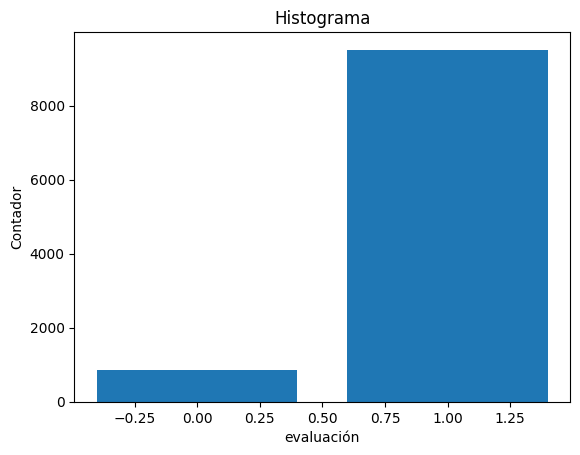

In [39]:
data_calification = data_set_transformada[100]
unique_categories, category_counts = np.unique(data_calification, return_counts=True)
plt.bar(unique_categories, category_counts)
plt.xlabel('evaluación')
plt.ylabel('Contador')
plt.title('Histograma')

In [41]:
data_set_transformada.to_csv('data_set_restaurantes_comentarios_pos_neg.csv', index=False)